# Quantium

Cristiane de Souza da Silva 

March 2021

## Task 1  - Data Preparation and Customer Analytics

- Creating and interpreting high level summaries of the data

- Finding outliers and removing these (if applicable)

- Checking data formats and correcting (if applicable)


### 1) Examine transaction data 

Look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables.

In [1]:
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trans_data =  pd.read_excel('QVI_transaction_data.xlsx')
trans_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


There are 264836 rows and there aren't null  values according to the info table.


### Changing the date format from 5-digit number to datetime

In [4]:
import datetime as dt

trans_data['DATE'] = pd.TimedeltaIndex(trans_data['DATE'], unit='d') + dt.datetime(1900,1,1)
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [6]:
#Sorting the table by date

trans_data = trans_data.sort_values(by='DATE').reset_index(drop=True)
trans_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1
2,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
3,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
4,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4
...,...,...,...,...,...,...,...,...
264831,2019-07-02,97,97085,96824,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6
264832,2019-07-02,148,148317,148317,112,Tyrrells Crisps Ched & Chives 165g,1,4.2
264833,2019-07-02,212,212068,210874,113,Twisties Chicken270g,2,9.2
264834,2019-07-02,55,55029,48630,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6


### Keep only the chip's products

In [7]:
### Removing Punctuation from 'PROD_NAME'
trans_data['PROD_NAME'] = trans_data['PROD_NAME'].str.replace(r'[^\w\s]+', '')
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-03,19,19205,16466,26,Pringles SweetSpcy BBQ 134g,1,3.7
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1
2,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
3,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2
4,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4


In [8]:
#Remove the entries with the word 'salsa'
chip_data = trans_data[~trans_data.PROD_NAME.str.contains("Salsa")]
chip_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-03,19,19205,16466,26,Pringles SweetSpcy BBQ 134g,1,3.7
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1
2,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
3,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2
4,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4


In [9]:
chip_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


<AxesSubplot:xlabel='PROD_QTY'>

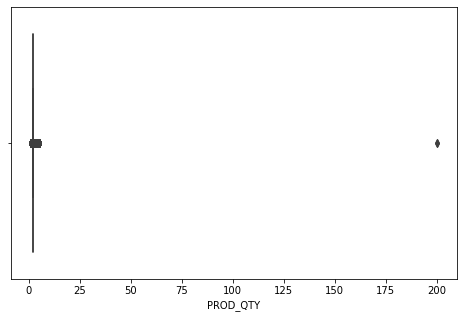

In [10]:
#Findiding Outliers

plt.figure(figsize=(8,5))
sns.boxplot(x=chip_data["PROD_QTY"])

In [11]:
#Information about the outlier
chip_data[chip_data["PROD_QTY"]>175]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
35771,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
234962,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [12]:
chip_data[chip_data["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
35771,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
234962,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


The customer '226000' has done only two transactions and they are of 200 Doritos. 
This customer will be removed.

In [13]:
#Removing the customer ' 226000'
chip_data=chip_data.drop(chip_data[chip_data["LYLTY_CARD_NBR"]==226000].index)
chip_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-03,19,19205,16466,26,Pringles SweetSpcy BBQ 134g,1,3.7
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1
2,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
3,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2
4,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4
...,...,...,...,...,...,...,...,...
264831,2019-07-02,97,97085,96824,33,Cobs Popd SwtChlli SrCream Chips 110g,2,7.6
264832,2019-07-02,148,148317,148317,112,Tyrrells Crisps Ched Chives 165g,1,4.2
264833,2019-07-02,212,212068,210874,113,Twisties Chicken270g,2,9.2
264834,2019-07-02,55,55029,48630,2,Cobs Popd Sour Crm Chives Chips 110g,2,7.6


In [14]:
#Creating two new columns derivided from PROD_NAME : PROD and SIZE
chip_data['PROD'], chip_data['SIZE'] = chip_data.loc[:,'PROD_NAME'].str.split('(?<=\\D)(?=\\d)').str

chip_data.head()

<ipython-input-14-c20b0452968c>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  chip_data['PROD'], chip_data['SIZE'] = chip_data.loc[:,'PROD_NAME'].str.split('(?<=\\D)(?=\\d)').str


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD,SIZE
0,2018-07-03,19,19205,16466,26,Pringles SweetSpcy BBQ 134g,1,3.7,Pringles SweetSpcy BBQ,134g
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1,GrnWves Plus Btroot Chilli Jam,180g
2,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,Infuzions Thai SweetChili PotatoMix,110g
3,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2,Kettle Tortilla ChpsFetaGarlic,150g
4,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,RRD SR Slow Rst Pork Belly,150g


In [15]:
chip_data.nunique()

DATE                 364
STORE_NBR            271
LYLTY_CARD_NBR     71287
TXN_ID            245255
PROD_NBR             105
PROD_NAME            105
PROD_QTY               5
TOT_SALES            104
PROD                 105
SIZE                  23
dtype: int64

In [16]:
chip_data["SIZE"].unique()

array(['134g', '180g', '110g', '150g', '175g', '150G', '160g', '170g',
       '380g', '165g', '250g', '270g', '210G', '175G', '125g',
       '135g Swt Pot Sea Salt', '90g', '200g', '70g', '330g', '220g',
       '210g', '190g'], dtype=object)

In [17]:
# Changing '135g'
chip_data["SIZE"]=chip_data["SIZE"].replace('135g Swt Pot Sea Salt', '135g')


In [18]:
chip_data["SIZE"].unique()

array(['134g', '180g', '110g', '150g', '175g', '150G', '160g', '170g',
       '380g', '165g', '250g', '270g', '210G', '175G', '125g', '135g',
       '90g', '200g', '70g', '330g', '220g', '210g', '190g'], dtype=object)

### Transactions by Date

In [19]:
chip_data.groupby('DATE')['TXN_ID'].count()

DATE
2018-07-03    663
2018-07-04    650
2018-07-05    674
2018-07-06    669
2018-07-07    660
             ... 
2019-06-28    657
2019-06-29    669
2019-06-30    673
2019-07-01    703
2019-07-02    704
Name: TXN_ID, Length: 364, dtype: int64

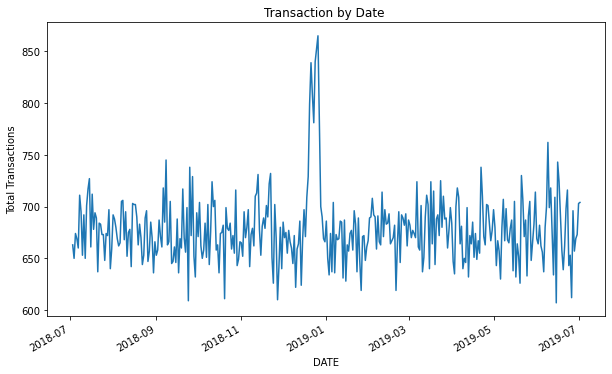

In [20]:
plt.figure(figsize=(10, 6))
chip_data.groupby('DATE')['TXN_ID'].count().plot(kind="line")
plt.title('Transaction by Date ')
plt.ylabel('Total Transactions')
plt.show()

There is a growth os sales on December due to the Christmas period. 

In [21]:
dec_mask = chip_data['DATE'].map(lambda x: x.month) == 12
chip_data[dec_mask]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD,SIZE
109383,2018-12-01,49,49376,46061,47,Doritos Corn Chips Original 170g,2,8.8,Doritos Corn Chips Original,170g
109384,2018-12-01,36,36206,32807,4,Dorito Corn Chp Supreme 380g,2,13.0,Dorito Corn Chp Supreme,380g
109385,2018-12-01,173,173157,174557,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream,175g
109386,2018-12-01,229,229065,230746,8,Smiths Crinkle Cut Chips Original 170g,2,5.8,Smiths Crinkle Cut Chips Original,170g
109387,2018-12-01,62,62021,57891,54,CCs Original 175g,2,4.2,CCs Original,175g
...,...,...,...,...,...,...,...,...,...,...
132231,2018-12-31,113,113059,115757,95,Sunbites Whlegrn Crisps FrchOnin 90g,2,3.4,Sunbites Whlegrn Crisps FrchOnin,90g
132232,2018-12-31,72,72316,71992,113,Twisties Chicken270g,2,9.2,Twisties Chicken,270g
132233,2018-12-31,203,203134,202849,17,Kettle Sensations BBQMaple 150g,2,9.2,Kettle Sensations BBQMaple,150g
132234,2018-12-31,184,184230,187770,66,CCs Nacho Cheese 175g,2,4.2,CCs Nacho Cheese,175g


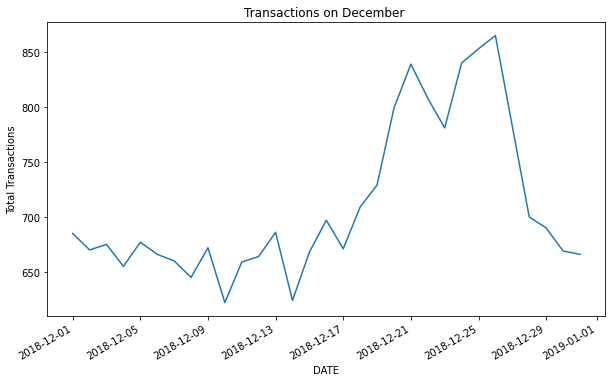

In [22]:
# Information about December
plt.figure(figsize=(10, 6))
chip_data[dec_mask].groupby('DATE')['TXN_ID'].count().plot(kind="line")
plt.title('Transactions on December ')
plt.ylabel('Total Transactions')
plt.show()

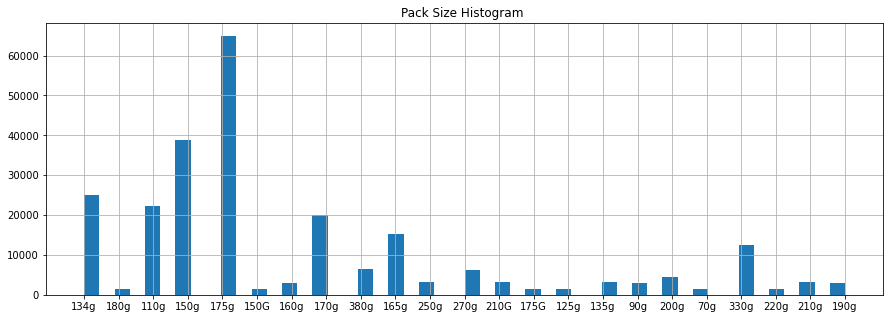

In [23]:
#Pack Size Histogram
plt.figure(figsize=(15,5))
chip_data["SIZE"].hist(bins=50)
plt.title('Pack Size Histogram ')
plt.show()

In [24]:
#Clear brand names

chip_data['PROD'] = chip_data['PROD'].replace('Red','RRD')
chip_data['PROD'] = chip_data['PROD'].replace('SNBTS','SUNBITES')
chip_data['PROD'] = chip_data['PROD'].replace('infzns','Infuzions')
chip_data['PROD'] = chip_data['PROD'].replace('WW','woolworths')
chip_data['PROD'] = chip_data['PROD'].replace('Smith','Smiths')
chip_data['PROD'] = chip_data['PROD'].replace('NCC','Natural')
chip_data['PROD'] = chip_data['PROD'].replace('Dorito','Doritos')
chip_data['PROD'] = chip_data['PROD'].replace('Grain','GrnWves')
chip_data['PROD'].value_counts()


Kettle Mozzarella   Basil  Pesto        3304
Kettle Tortilla ChpsHnyJlpno Chili      3296
Cobs Popd SwtChlli SrCream Chips        3269
Tyrrells Crisps     Ched  Chives        3268
Cobs Popd Sea Salt  Chips               3265
                                        ... 
Sunbites Whlegrn    Crisps FrchOnin     1432
RRD Pc Sea Salt                         1431
NCC Sour Cream     Garden Chives        1419
French Fries Potato Chips               1418
WW Crinkle Cut      Original            1410
Name: PROD, Length: 105, dtype: int64

### 2) Examine Customer Data 

In [25]:
cust_data =  pd.read_csv('QVI_purchase_behaviour.csv')
cust_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [26]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
cust_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [28]:
cust_data.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [29]:
cust_data['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [30]:
#Joinning the two datas
customer_chip = pd.merge(chip_data, cust_data, on="LYLTY_CARD_NBR")

#customer_chip = chip_data.join(cust_data, how="inner")

customer_chip



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD,SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles SweetSpcy BBQ 134g,1,3.7,Pringles SweetSpcy BBQ,134g,OLDER SINGLES/COUPLES,Mainstream
1,2018-08-21,19,19205,16467,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135g,OLDER SINGLES/COUPLES,Mainstream
2,2018-09-20,19,19205,16468,88,Kettle Honey Soy Chicken 175g,2,10.8,Kettle Honey Soy Chicken,175g,OLDER SINGLES/COUPLES,Mainstream
3,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1,GrnWves Plus Btroot Chilli Jam,180g,OLDER FAMILIES,Mainstream
4,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,Infuzions Thai SweetChili PotatoMix,110g,OLDER FAMILIES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-07-02,181,181207,183425,25,Pringles SourCream Onion 134g,2,7.4,Pringles SourCream Onion,134g,MIDAGE SINGLES/COUPLES,Mainstream
246736,2019-07-02,28,28150,25420,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2,Kettle Tortilla ChpsFetaGarlic,150g,YOUNG SINGLES/COUPLES,Budget
246737,2019-07-02,99,99020,98242,23,Cheezels Cheese 330g,1,5.7,Cheezels Cheese,330g,RETIREES,Premium
246738,2019-07-02,38,38458,34529,48,Red Rock Deli Sp Salt Truffle 150G,2,5.4,Red Rock Deli Sp Salt Truffle,150G,OLDER SINGLES/COUPLES,Mainstream


In [31]:
customer_chip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PROD              246740 non-null  object        
 9   SIZE              246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 24.5+ MB


In [32]:
customer_chip.nunique()

DATE                   364
STORE_NBR              271
LYLTY_CARD_NBR       71287
TXN_ID              245255
PROD_NBR               105
PROD_NAME              105
PROD_QTY                 5
TOT_SALES              104
PROD                   105
SIZE                    23
LIFESTAGE                7
PREMIUM_CUSTOMER         3
dtype: int64

### Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is.

In [33]:
customer_chip['mean'] = customer_chip['TOT_SALES']/customer_chip['PROD_QTY']

In [34]:
#Quantity of sales by premium customer !!!!!!!

sales_life = customer_chip.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum().reset_index()
sales_life

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


In [35]:
sales_life_pivot = sales_life.pivot(index='PREMIUM_CUSTOMER', columns='LIFESTAGE', values='TOT_SALES')
sales_life_pivot

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PREMIUM_CUSTOMER,,,,,,,
Budget,33345.70,20607.45,156863.75,127833.60,105916.30,129717.95,57122.1
Mainstream,84734.25,15979.70,96413.55,124648.50,145168.95,86338.25,147582.2
Premium,54443.85,10760.80,75242.60,123537.55,91296.65,78571.70,39052.3


In [36]:
sales_life_dict = sales_life_pivot.to_dict('list') #'list' because I want only the values of the 'TOT_SALES'
names = list(sales_life_pivot.index)

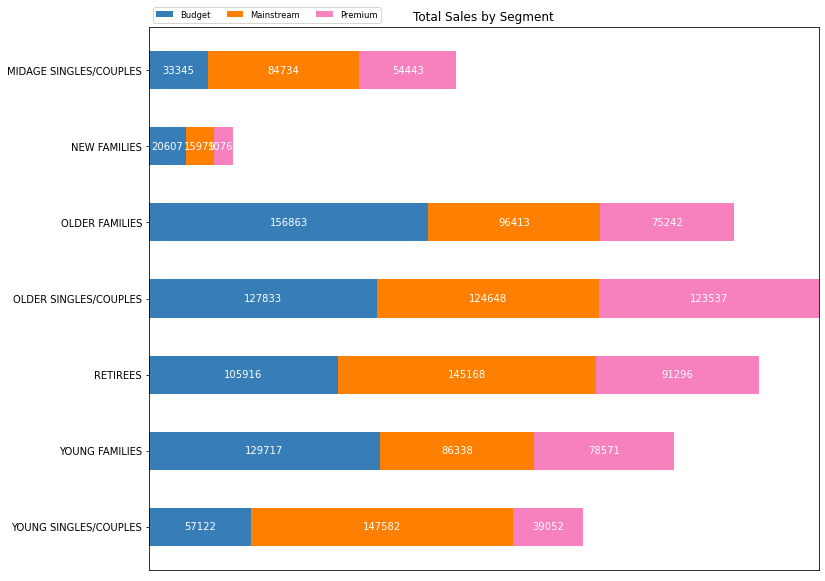

In [37]:
def survey(sales_life_dict, names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(sales_life_dict.keys())
    data = np.array(list(sales_life_dict.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Set1')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(sales_life_dict, names)
plt.title('Total Sales by Segment')
plt.show()

In [38]:
total_sales = customer_chip.groupby(['LIFESTAGE']).TOT_SALES.sum().reset_index()
total_sales.sort_values('TOT_SALES', ascending=False)

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,376019.65
4,RETIREES,342381.90
2,OLDER FAMILIES,328519.90
5,YOUNG FAMILIES,294627.90
6,YOUNG SINGLES/COUPLES,243756.60
0,MIDAGE SINGLES/COUPLES,172523.80
1,NEW FAMILIES,47347.95


Older Singles/Couples are who spend more on chips. Also, they are the lifestage who has the largest number in Premium segmentation.

### How many customers are in each segment

In [39]:
customer_segment = customer_chip.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique().reset_index()
customer_segment

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2231
9,OLDER SINGLES/COUPLES,Budget,4849


In [40]:
customer_segment_pivot = customer_segment.pivot(index='PREMIUM_CUSTOMER', columns='LIFESTAGE', values='LYLTY_CARD_NBR')
customer_segment_pivot

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PREMIUM_CUSTOMER,,,,,,,
Budget,1474,1087,4611,4849,4385,3953,3647
Mainstream,3298,830,2788,4858,6358,2685,7917
Premium,2369,575,2231,4682,3812,2398,2480


In [41]:
customer_segment_dic = customer_segment_pivot.to_dict('list') #'list' because I want only the values of the 'TOT_SALES'
customer_names = list(customer_segment_pivot.index)

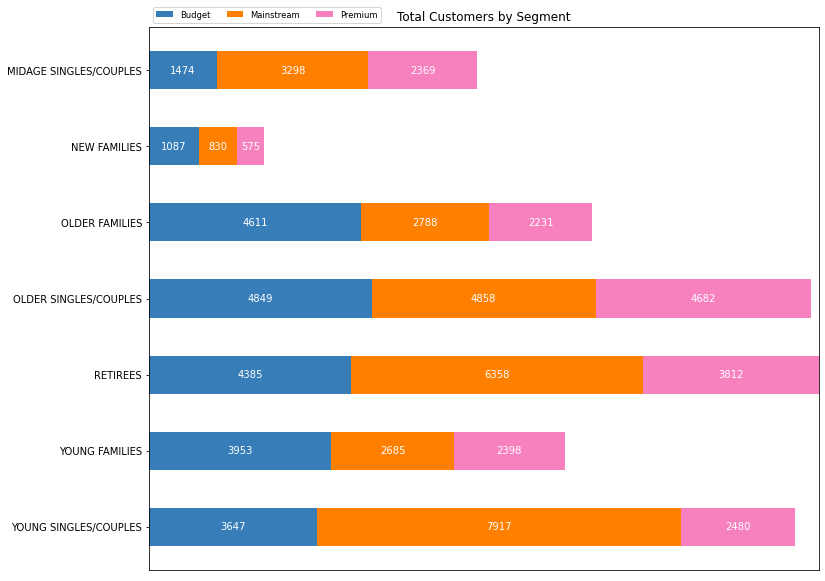

In [42]:
survey(customer_segment_dic, customer_names)
plt.title('Total Customers by Segment')
plt.show()

We can see that there are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips.
Also, there are more Premium - older singles/couples followed by Premium retirees. Maybe because they have the highest salary but also because they have other **priorities** to their salary.

In [43]:
#customer_chip.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].count().sort_values()

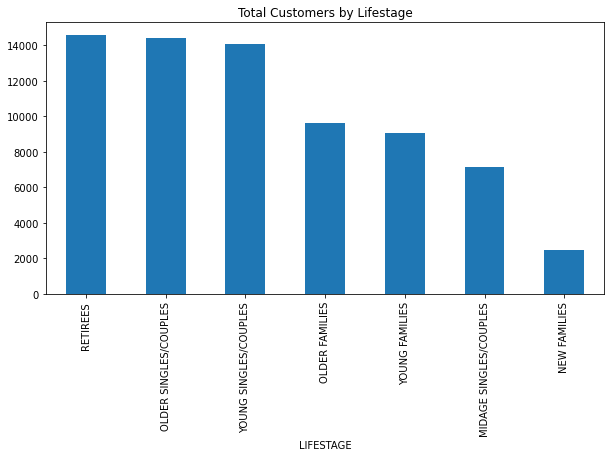

In [44]:
plt.figure(figsize=(10,5))
customer_chip.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False).plot.bar()
plt.title('Total Customers by Lifestage');

### How many chips are bought per customer by segment

In [45]:
customer_chip.groupby('LIFESTAGE')['PROD_QTY'].sum().sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     97185
OLDER FAMILIES            87896
RETIREES                  87875
YOUNG FAMILIES            78577
YOUNG SINGLES/COUPLES     62300
MIDAGE SINGLES/COUPLES    44496
NEW FAMILIES              12070
Name: PROD_QTY, dtype: int64

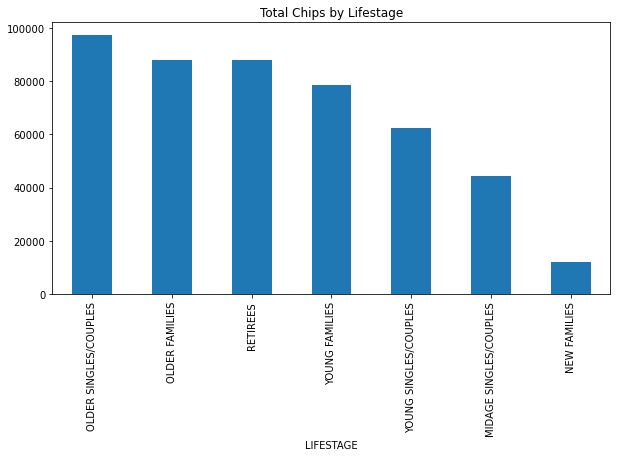

In [46]:
plt.figure(figsize=(10,5))
customer_chip.groupby('LIFESTAGE')['PROD_QTY'].sum().sort_values(ascending=False).plot.bar()
plt.title('Total Chips by Lifestage');

### Top 5 products sold

In [47]:
top_products = customer_chip.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head()
top_products

PROD_NAME
Kettle Mozzarella   Basil  Pesto 175g      6381
Kettle Tortilla ChpsHnyJlpno Chili 150g    6309
Cobs Popd Sea Salt  Chips 110g             6277
Cobs Popd SwtChlli SrCream Chips 110g      6256
Tostitos Splash Of  Lime 175g              6234
Name: PROD_QTY, dtype: int64

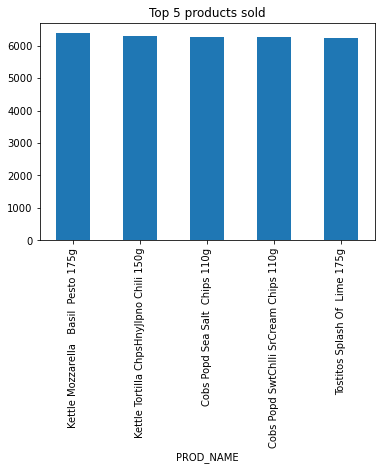

In [48]:
top_products.plot.bar()
plt.title('Top 5 products sold');

### Top 5 size sold

In [49]:

top_size = customer_chip.groupby('SIZE')['PROD_QTY'].count().sort_values(ascending=False).head()
top_size

SIZE
175g    64929
150g    38705
134g    25102
110g    22387
170g    19983
Name: PROD_QTY, dtype: int64

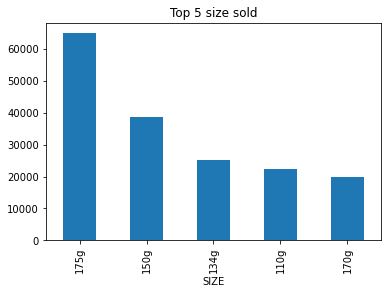

In [50]:
top_size.plot.bar()
plt.title('Top 5 size sold');

### Average price per unit sold

In [51]:
customer_chip['Price_per_Unit'] = customer_chip['TOT_SALES']/customer_chip['PROD_QTY']
customer_chip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD,SIZE,LIFESTAGE,PREMIUM_CUSTOMER,mean,Price_per_Unit
0,2018-07-03,19,19205,16466,26,Pringles SweetSpcy BBQ 134g,1,3.7,Pringles SweetSpcy BBQ,134g,OLDER SINGLES/COUPLES,Mainstream,3.7,3.7
1,2018-08-21,19,19205,16467,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,135g,OLDER SINGLES/COUPLES,Mainstream,4.2,4.2
2,2018-09-20,19,19205,16468,88,Kettle Honey Soy Chicken 175g,2,10.8,Kettle Honey Soy Chicken,175g,OLDER SINGLES/COUPLES,Mainstream,5.4,5.4
3,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1,GrnWves Plus Btroot Chilli Jam,180g,OLDER FAMILIES,Mainstream,3.1,3.1
4,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,Infuzions Thai SweetChili PotatoMix,110g,OLDER FAMILIES,Budget,3.8,3.8


In [52]:
price_segment_mean = pd.DataFrame(customer_chip.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['Price_per_Unit'].mean())
np.round(price_segment_mean,2)

Price_per_Unit
LIFESTAGE              PREMIUM_CUSTOMER                
MIDAGE SINGLES/COUPLES Budget                      3.74
                       Mainstream                  3.99
                       Premium                     3.77
NEW FAMILIES           Budget                      3.92
                       Mainstream                  3.92
                       Premium                     3.87
OLDER FAMILIES         Budget                      3.75
                       Mainstream                  3.74
                       Premium                     3.72
OLDER SINGLES/COUPLES  Budget                      3.88
                       Mainstream                  3.81
                       Premium                     3.89
RETIREES               Budget                      3.92
                       Mainstream                  3.84
                       Premium                     3.92
YOUNG FAMILIES         Budget                      3.76
                       Mainstream                  3.72
                       Premium                     3.76
YOUNG SINGLES/COUPLES  Budget                      3.66
                       Mainstream                  4.07
                       Premium                     3.67

<Figure size 720x360 with 0 Axes>

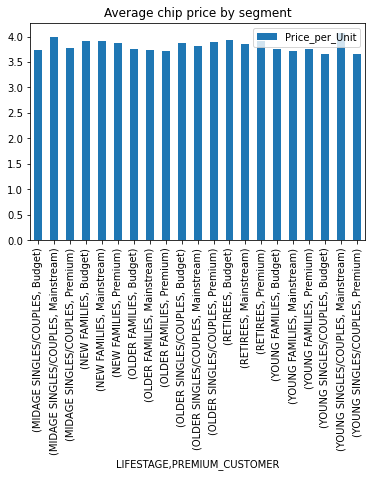

In [56]:
plt.figure(figsize=(10,5))
price_segment_mean.plot.bar()
plt.title('Average chip price by segment');

Mainstream Yong Singles/Couples and Midage Singles/Couples  pay more per unit of chip product (packet) comparing to teh other group.

### T-Test

In [57]:
from scipy import stats
stats.ttest_1samp(price_segment_mean['Price_per_Unit'], 0) 

Ttest_1sampResult(statistic=159.93897194537303, pvalue=1.4927005043899994e-32)

The p-value is to small, 1.49e-32. That means the resuklts are considered highly statiscatically significant.